타이타닉 생존 예측 - Tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
os.environ['PATH']

'C:\\Users\\wtime\\Anaconda3;C:\\Users\\wtime\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\usr\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\bin;C:\\Users\\wtime\\Anaconda3\\Scripts;C:\\Users\\wtime\\Anaconda3\\bin;C:\\Users\\wtime\\Anaconda3\\condabin;C:\\Users\\wtime\\Anaconda3;C:\\Users\\wtime\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\usr\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\bin;C:\\Users\\wtime\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;C:\\Users\\wtime\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

In [3]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [4]:
df.Name.nunique()

887

In [5]:
df = df.set_index('Name')

In [8]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [10]:
df.Survived.mean() # 38%생존

0.3855693348365276

(array([  7.,  17.,  18.,  42.,  59.,  74., 146., 140.,  18.,  24.]),
 array([-74. , -66.7, -59.4, -52.1, -44.8, -37.5, -30.2, -22.9, -15.6,
         -8.3,  -1. ]),
 <a list of 10 Patch objects>)

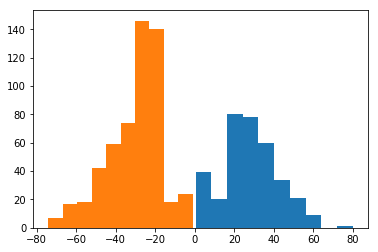

In [24]:
plt.hist(df[df['Survived']==1]['Age'].values)
plt.hist(-df[df['Survived']==0]['Age'].values)

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

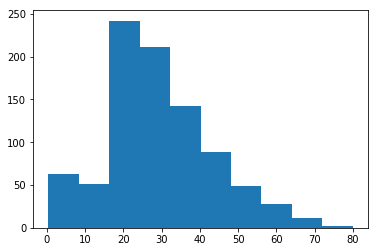

In [29]:
plt.hist(df['Age'].values)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 487.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

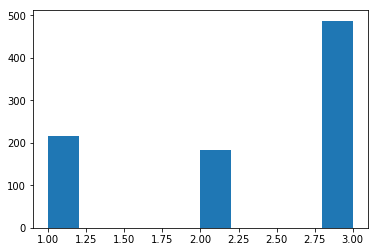

In [25]:
plt.hist(df['Pclass'].values)

In [27]:
s = df['Sex']
s.value_counts()

male      573
female    314
Name: Sex, dtype: int64

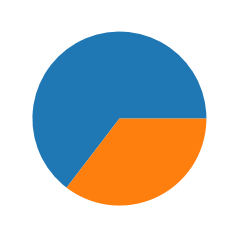

In [28]:
p = plt.pie(s.value_counts())

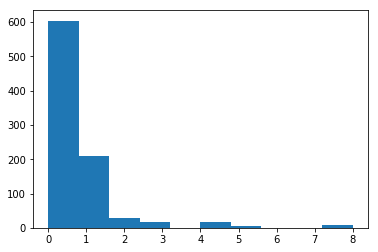

In [30]:
p = plt.hist(df['Siblings'].values)

(array([ 24.,  18., 140., 146.,  74.,  59.,  42.,  18.,  17.,   7.]),
 array([101. , 108.3, 115.6, 122.9, 130.2, 137.5, 144.8, 152.1, 159.4,
        166.7, 174. ]),
 <a list of 10 Patch objects>)

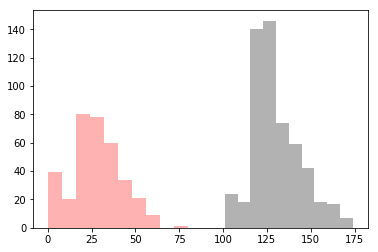

In [41]:
plt.hist(df[df['Survived']==1]['Age'].values, alpha=0.3, color='red', bins=10)
plt.hist(df[df['Survived']==0]['Age'].values+100, alpha=0.3, color='black', bins=10)

In [35]:
df.head(1)

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.25


(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

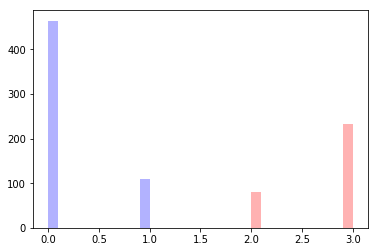

In [39]:
plt.hist(df[df['Sex']=='male']['Survived'].values, alpha=0.3, color='blue', bins=10)
plt.hist(df[df['Sex']=='female']['Survived'].values+2, alpha=0.3, color='red', bins=10)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, Mr. Owen Harris Braund to Mr. Patrick Dooley
Data columns (total 7 columns):
Survived    887 non-null int64
Pclass      887 non-null int64
Sex         887 non-null object
Age         887 non-null float64
Siblings    887 non-null int64
Parents     887 non-null int64
Fare        887 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 95.4+ KB


In [45]:
# 1,2,3등석은 범주형입니다.
df['Pclass'] = df['Pclass'].astype('object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, Mr. Owen Harris Braund to Mr. Patrick Dooley
Data columns (total 7 columns):
Survived    887 non-null int64
Pclass      887 non-null object
Sex         887 non-null object
Age         887 non-null float64
Siblings    887 non-null int64
Parents     887 non-null int64
Fare        887 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 95.4+ KB


In [47]:
data = pd.get_dummies(df)

In [48]:
data.head()

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [49]:
X = data.drop(columns='Survived')
y = data['Survived']

In [51]:
X.head()

,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,
Mr. Owen Harris Braund,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,35.0,0,0,8.0500,0,0,1,0,1


In [54]:
y.head()

Name
Mr. Owen Harris Braund                                0
Mrs. John Bradley (Florence Briggs Thayer) Cumings    1
Miss. Laina Heikkinen                                 1
Mrs. Jacques Heath (Lily May Peel) Futrelle           1
Mr. William Henry Allen                               0
Name: Survived, dtype: int64

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X,y)

In [56]:
model.score(X,y)

0.9819616685456595

In [58]:
import graphviz

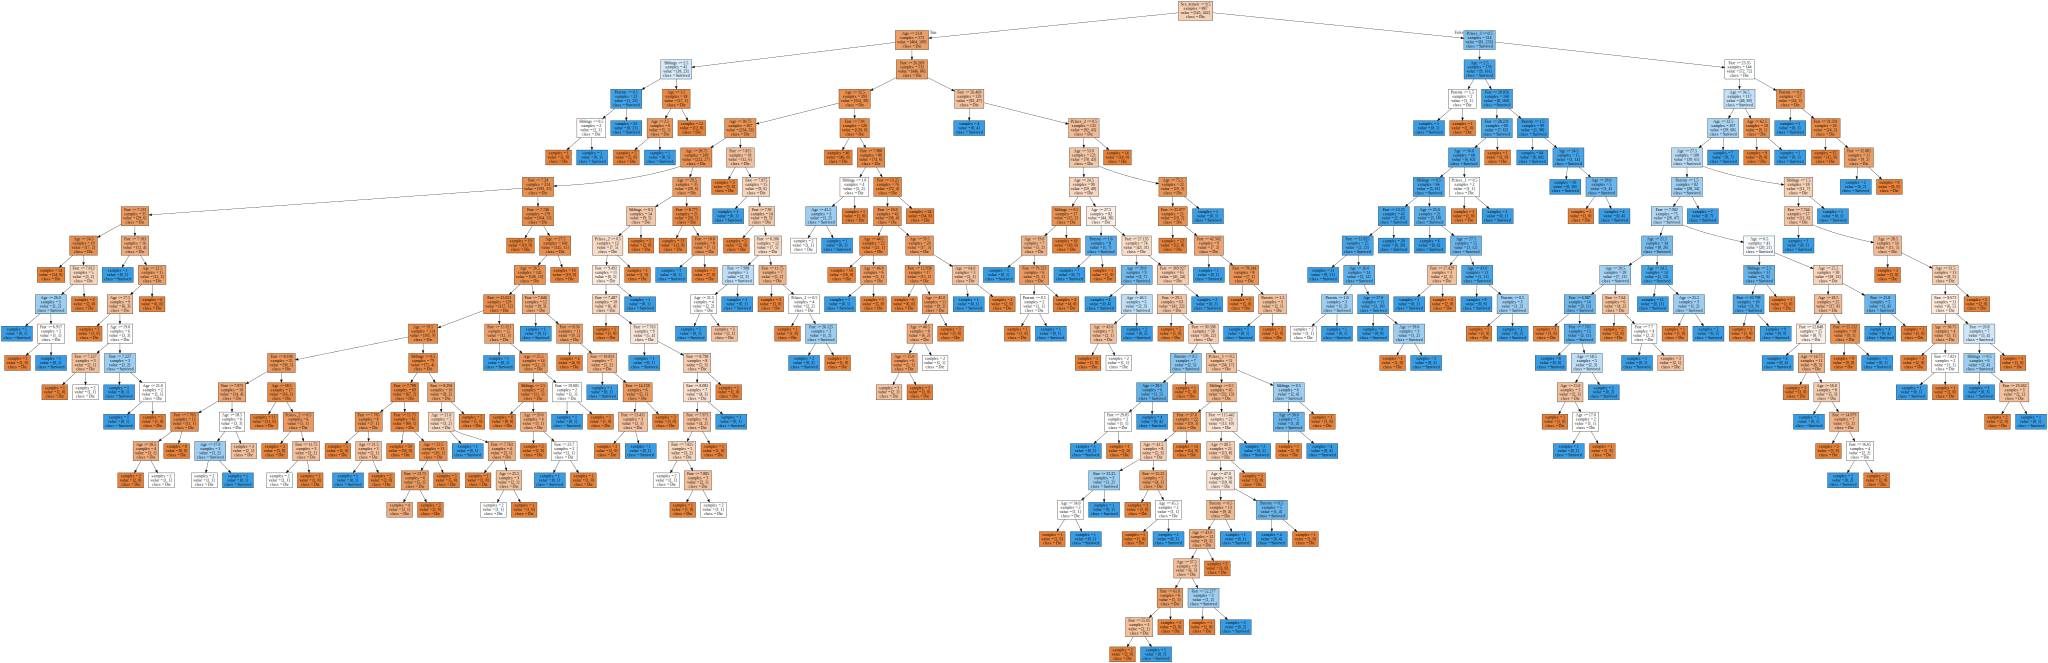

In [61]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','Survived'], feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [64]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [65]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [66]:
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [67]:
loans = loans.dropna()

In [68]:
loans.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [69]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [70]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [71]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [73]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

In [74]:
loans.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

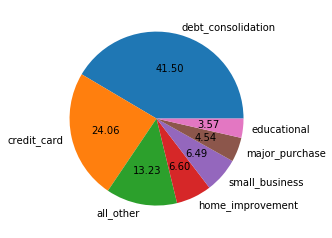

In [76]:
p = plt.pie(loans.purpose.value_counts(),labels=loans.purpose.unique(), autopct='%.2f')

Text(0.5, 1.0, 'installment')

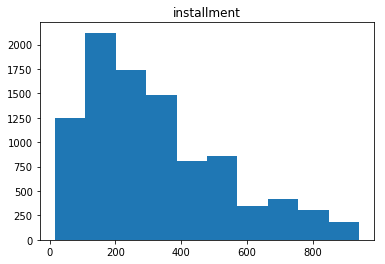

In [78]:
p=plt.hist(loans['installment'])
plt.title('installment')

Text(0.5, 1.0, 'int.rate')

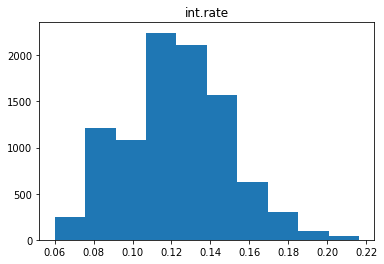

In [80]:
p=plt.hist(loans['int.rate'])
plt.title('int.rate')

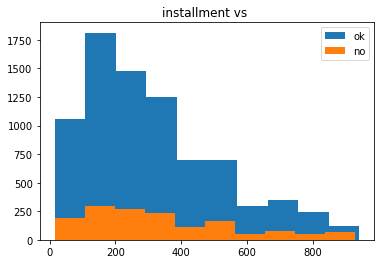

In [82]:
p=plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p=plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
plt.title('installment vs ')
plt.legend()

In [83]:
loans = pd.get_dummies(loans) # 카테고리를 원핫 인코딩

In [84]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [86]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [87]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

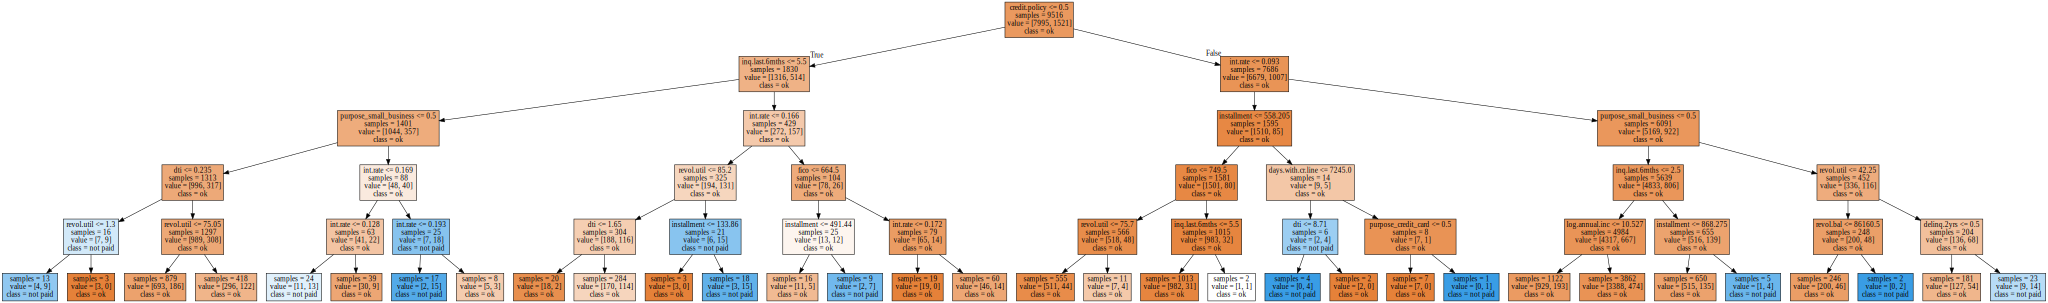

In [88]:
export_graphviz(model, out_file='loan.dot', class_names=['ok','not paid'], feature_names=X.columns, impurity=False, filled=True)
with open('loan.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)